In [129]:
import pandas as pd
import scipy.io as sio
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [130]:
#importing data to python 
leftSacc_mat = sio.loadmat('/Users/SydneyWalker/Desktop/army data ai4vs/compiledData/leftSacc.mat')
leftSacc = leftSacc_mat['leftSacc2']

In [131]:
error_mat = sio.loadmat('/Users/SydneyWalker/Desktop/army data ai4vs/compiledData/allError.mat')
error = error_mat['error2']

In [132]:
#create a new list with a row that contains each of the subject IDs ([i][0])
leftSacc2 = []

for i in range(len(leftSacc)):
    leftSacc2.append(leftSacc[i][0].tolist())

#append the rest of the columns of leftsacc data to each respective subject, exlcuding the trials of empty rows
for i in range(len(leftSacc)):
    for j in range(1,len(leftSacc[i])):
        if len(leftSacc[i][j]) > 0:
            leftSacc2[i].append(leftSacc[i][j])

In [133]:
error2 = []

#create a new list with a row that contains each of the subject IDs ([i][0])
for i in range(len(error)):
    error2.append(error[i][0].tolist())

#append the rest of the columns of error data to each respective subject, exlcuding the trials of empty rows
for i in range(len(error)):
    for j in range(1,len(error[i])):
        if len(error[i][j]) > 0:
            error2[i].append(error[i][j].tolist())

In [134]:
#create new list with a row that contaisn each of the subject IDs ([i][0])
leftSaccade = []
for i in range(len(leftSacc2)):
    leftSaccade.append(leftSacc[i][0].tolist())

#append the rest of the columns of leftsacc data to each respective subject, exlcuding the padded columns of empty lists
for i in range(len(leftSacc2)):
    for j in range(1,len(leftSacc2[i])):
        if len(leftSacc2[i][j][0]) > 0:
            leftSaccade[i].append(leftSacc2[i][j])


In [135]:
#selecting the varibales of interest
for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        leftSaccade[i][j] = leftSaccade[i][j][['duration','amp','avgvel']]

In [136]:
leftSaccError = []

#create new list with a row that contaisn each of the subject IDs ([i][0])
for i in range(len(error2)):
    leftSaccError.append(error[i][0].tolist())

#append the rest of the columns of error data to each respective subject, exlcuding the padded columns of empty lists
for i in range(len(error2)):
    for j in range(1,len(error2[i])):
        if len(error2[i][j][0]) > 0:
            leftSaccError[i].append(error2[i][j])

In [137]:
for i in range(len(leftSaccError)):
    if len(leftSaccError[i]) != len(leftSaccade[i]):
        print([i]) 
#checking that the error and leftsaccade data are of the same length

In [138]:
lengths = []
for i in range(len(leftSaccade)):
    lengths.append(len(leftSaccade[i]))

print(np.percentile(lengths,33)) # == 220
print(np.percentile(lengths,66)) # == 275
#anything equal to or less than length 220 will be considered an early trial
#anything greatter than length 220 and equal to or less than 275 will be considered a middle trial
#anything greater than length 275 will be considered a late trial

220.56
275.36


In [139]:
#making this in list format to make each saccade in tuple format so we can append the error
for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        leftSaccade[i][j] = leftSaccade[i][j].tolist()

In [140]:
#adding the error to the left saccade data
for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        for k in range(len(leftSaccade[i][j][0])):
            leftSaccade[i][j][0][k] = leftSaccade[i][j][0][k] + tuple(leftSaccError[i][j])

In [141]:
earlySacc = []

#all of the trials before len(220)
for i in range(len(leftSacc)):
    earlySacc.append(leftSacc[i][0].tolist())

for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        if j <= 219: 
            earlySacc[i].append(leftSaccade[i][j])

In [142]:
midSacc = []

#all of the trials between len(220) and len(275)
for i in range(len(leftSacc)):
    midSacc.append(leftSacc[i][0].tolist())

for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        if j > 219 and j <= 274 :
            midSacc[i].append(leftSaccade[i][j])

In [143]:
lateSacc = []

#all of the trails after len(275)
for i in range(len(leftSacc)):
    lateSacc.append(leftSacc[i][0].tolist())

for i in range(len(leftSaccade)):
    for j in range(1,len(leftSaccade[i])):
        if j > 274 :
            lateSacc[i].append(leftSaccade[i][j])


In [144]:
earlyIV = []

#independent variables for the early trials (duration, amp, avg velocity)
for i in range(len(earlySacc)):
    for j in range(1,len(earlySacc[i])):
        for row in earlySacc[i][j][0]:
            earlyIV.append(row[0:3])

earlyDV = []

#dependent variable for the early trials (error)
for i in range(len(earlySacc)):
    for j in range(1,len(earlySacc[i])):
        for row in earlySacc[i][j][0]:
            earlyDV.append(row[3])

In [145]:
midIV = []

#independent variables for the middle trials (duration, amp, avg velocity)
for i in range(len(midSacc)):
    for j in range(1,len(midSacc[i])):
        for row in midSacc[i][j][0]:
            midIV.append(row[0:3])

midDV = []

#dependent variable for the middle trials (error)
for i in range(len(midSacc)):
    for j in range(1,len(midSacc[i])):
        for row in midSacc[i][j][0]:
            midDV.append(row[3])

In [146]:
lateIV = []

#independent variables for the late trials (duration, amp, avg velocity)
for i in range(len(lateSacc)):
    for j in range(1,len(lateSacc[i])):
        for row in lateSacc[i][j][0]:
            lateIV.append(row[0:3])

lateDV = []

#dependent variable for the late trials (error)
for i in range(len(lateSacc)):
    for j in range(1,len(lateSacc[i])):
        for row in lateSacc[i][j][0]:
            lateDV.append(row[3])

In [147]:
#making the format into a float so it can be converted into an array

for i in range(len(earlyDV)):
        earlyDV[i] = abs((float(earlyDV[i][0])))

for i in range(len(midDV)):
        midDV[i] = abs((float(midDV[i][0])))

for i in range(len(lateDV)):
        lateDV[i] = abs((float(lateDV[i][0])))

In [148]:
print('Avg error from the early trials: ' + str("{:.3f}".format(np.mean(earlyDV))))
print('Avg error from the middle trials: ' + str("{:.3f}".format(np.mean(midDV))))
print('Avg error from the late trials: ' + str("{:.3f}".format(np.mean(lateDV))))

Avg error from the early trials: 0.245
Avg error from the middle trials: 0.237
Avg error from the late trials: 0.280


In [149]:
#removing some of the rows that still have missing values

earlyDV2 = []
earlyIV2 = []

for i in range(len(earlyIV)):
    if np.shape((earlyIV[i])) != (3, 0, 0):
        earlyIV2.append(earlyIV[i])
        earlyDV2.append(earlyDV[i])

In [150]:
#removing some of the rows that still have missing values

midDV2 = []
midIV2 = []

for i in range(len(midIV)):
    if np.shape((midIV[i])) != (3, 0, 0):
        midIV2.append(midIV[i])
        midDV2.append(midDV[i])

In [151]:
#removing some of the rows that still have missing values

lateDV2 = []
lateIV2 = []

for i in range(len(lateIV)):
    if np.shape((lateIV[i])) != (3, 0, 0):
        lateIV2.append(lateIV[i])
        lateDV2.append(lateDV[i])

In [152]:
#separting the data into 2 separate arrays: one with the indepent variabes 
#and the other with the dependent variable to feed into OLS model

earlyX = np.empty([len(earlyIV2),3])
for i in range(len(earlyIV2)):
    for j in range(len(earlyIV2[i])):
        earlyX[i][j] = earlyIV2[i][j]

earlyY = np.empty([len(earlyDV2),1])
for i in range(len(earlyDV2)):
    earlyY[i] = earlyDV2[i]

X = sm.add_constant(earlyX)
model = sm.OLS(earlyY, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     68.59
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           2.87e-44
Time:                        15:52:00   Log-Likelihood:                -27716.
No. Observations:               58895   AIC:                         5.544e+04
Df Residuals:                   58891   BIC:                         5.548e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2184      0.003     68.756      0.0

In [153]:
#separting the data into 2 separate arrays: one with the indepent variabes 
#and the other with the dependent variable to feed into OLS 

midX = np.empty([len(midIV2),3])
for i in range(len(midIV2)):
    for j in range(len(midIV2[i])):
        midX[i][j] = midIV2[i][j]

midY = np.empty([len(midDV2),1])
for i in range(len(midDV2)):
    midY[i] = midDV2[i]

X = sm.add_constant(midX)
model = sm.OLS(midY, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     45.88
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           2.90e-29
Time:                        15:52:00   Log-Likelihood:                -208.16
No. Observations:                5316   AIC:                             424.3
Df Residuals:                    5312   BIC:                             450.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1814      0.011     15.952      0.0

In [154]:
#separting the data into 2 separate arrays: one with the indepent variabes 
#and the other with the dependent variable to feed into OLS 

lateX = np.empty([len(lateIV2),3])
for i in range(len(lateIV2)):
    for j in range(len(lateIV2[i])):
        lateX[i][j] = lateIV2[i][j]

lateY = np.empty([len(lateDV2),1])
for i in range(len(lateDV2)):
    lateY[i] = lateDV2[i]

X = sm.add_constant(lateX)
model = sm.OLS(lateY, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     36.93
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           4.15e-23
Time:                        15:52:00   Log-Likelihood:                -497.65
No. Observations:                1687   AIC:                             1003.
Df Residuals:                    1683   BIC:                             1025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1339      0.023      5.752      0.0

In [155]:
#performing PCA analysis

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(earlyX)

# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Access results
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
loadings = pca.components_

# Print the explained variance ratio of each principal component
print("Early trials")
print("Explained variance ratio:")
for ratio in explained_variance_ratio:
    print(ratio)

variable_names = ["Duration", "Amplitude", "Avg Velocity"]

# Print the eigenvalues with corresponding variable names
print("\nEigenvalues:")
for i, value in enumerate(pca.explained_variance_):
    print(f"{variable_names[i]}: {value}")

# Print the loadings (coefficients) of each original variable in the principal components
print("\nLoadings:")
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for j, loading in enumerate(component):
        print(f"{variable_names[j]}: {loading}")


Early trials
Explained variance ratio:
0.6418212120391085
0.3285282502849744
0.029650537675917105

Eigenvalues:
Duration: 1.9254963298323624
Amplitude: 0.9856014857474368
Avg Velocity: 0.08895312339576547

Loadings:

Principal Component 1:
Duration: 0.6405494532348216
Amplitude: 0.7042641816071408
Avg Velocity: 0.30611821322128996

Principal Component 2:
Duration: -0.41914248502821294
Amplitude: -0.013374730741532025
Avg Velocity: 0.9078219505067971

Principal Component 3:
Duration: -0.6434407316955815
Amplitude: 0.7098120026336661
Avg Velocity: -0.28661986273152634


In [156]:
#performing PCA analysis

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(midX)

# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Access results
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
loadings = pca.components_

# Print the explained variance ratio of each principal component
print("Middle trials")
print("Explained variance ratio:")
for ratio in explained_variance_ratio:
    print(ratio)

variable_names = ["Duration", "Amplitude", "Avg Velocity"]

# Print the eigenvalues with corresponding variable names
print("\nEigenvalues:")
for i, value in enumerate(pca.explained_variance_):
    print(f"{variable_names[i]}: {value}")

# Print the loadings (coefficients) of each original variable in the principal components
print("\nLoadings:")
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for j, loading in enumerate(component):
        print(f"{variable_names[j]}: {loading}")

Middle trials
Explained variance ratio:
0.736927031042709
0.24628022477050138
0.016792744186789717

Eigenvalues:
Duration: 2.2111970444156333
Amplitude: 0.7389796847864432
Avg Velocity: 0.05038771106132111

Loadings:

Principal Component 1:
Duration: 0.6107141127564494
Amplitude: 0.6564675316625451
Avg Velocity: 0.4428076922920247

Principal Component 2:
Duration: -0.45710787347172555
Amplitude: -0.16435428500109278
Avg Velocity: 0.8740938513752036

Principal Component 3:
Duration: -0.6465915747133272
Amplitude: 0.7362323334890045
Avg Velocity: -0.19970299605933564


In [157]:
#performing PCA analysis

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(lateX)

# Step 2: Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Step 3: Access results
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
loadings = pca.components_

# Print the explained variance ratio of each principal component
print("Late trials")
print("Explained variance ratio:")
for ratio in explained_variance_ratio:
    print(ratio)

variable_names = ["Duration", "Amplitude", "Avg Velocity"]

# Print the eigenvalues with corresponding variable names
print("\nEigenvalues:")
for i, value in enumerate(pca.explained_variance_):
    print(f"{variable_names[i]}: {value}")

# Print the loadings (coefficients) of each original variable in the principal components
print("\nLoadings:")
for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for j, loading in enumerate(component):
        print(f"{variable_names[j]}: {loading}")

Late trials
Explained variance ratio:
0.7315382185097494
0.25481189880223315
0.013649882688017374

Eigenvalues:
Duration: 2.1959163249572016
Amplitude: 0.7648890983618636
Avg Velocity: 0.0409739361115397

Loadings:

Principal Component 1:
Duration: 0.6316809442490171
Amplitude: 0.6558982469303731
Avg Velocity: 0.4132513452444331

Principal Component 2:
Duration: -0.37120827980613474
Amplitude: -0.21207138745421225
Avg Velocity: 0.9040078205561143

Principal Component 3:
Duration: 0.6805759308674094
Amplitude: -0.7244468346931393
Avg Velocity: 0.10951340569560716


In [158]:
#combining the data into 1 single array with both the indepent variabes 
#and the dependent variable to feed into PCA 

allEarly = np.empty([len(earlyIV2),4])
for i in range(len(earlyIV2)):
    allEarly[i][0] = earlyIV2[i][0]
    allEarly[i][1] = earlyIV2[i][1]
    allEarly[i][2] = earlyIV2[i][2]
    allEarly[i][3] = earlyDV2[i]
    
allMid = np.empty([len(midIV2),4])
for i in range(len(midIV2)):
    allMid[i][0] = midIV2[i][0]
    allMid[i][1] = midIV2[i][1]
    allMid[i][2] = midIV2[i][2]
    allMid[i][3] = midDV2[i]

allLate = np.empty([len(lateIV2),4])
for i in range(len(lateIV2)):
    allLate[i][0] = lateIV2[i][0]
    allLate[i][1] = lateIV2[i][1]
    allLate[i][2] = lateIV2[i][2]
    allLate[i][3] = lateDV2[i]

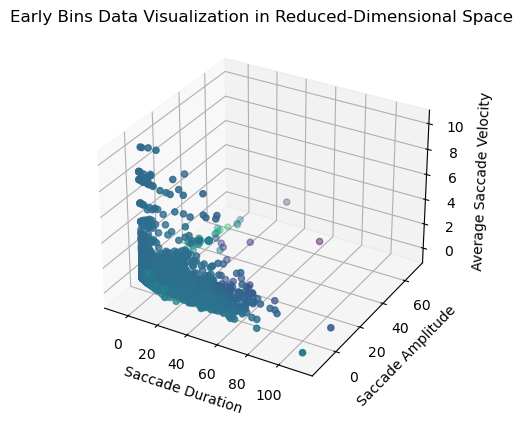

In [159]:
#combining the data into 1 single array with both the indepent variabes 
#and the dependent variable to feed into PCA 

# Perform PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(allEarly)

# Visualize the data in the reduced-dimensional space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1],
           principal_components[:, 2], c=principal_components[:, 3])
ax.set_xlabel("Saccade Duration")
ax.set_ylabel("Saccade Amplitude")
ax.set_zlabel("Average Saccade Velocity")
ax.set_title("Early Bins Data Visualization in Reduced-Dimensional Space")
plt.show()


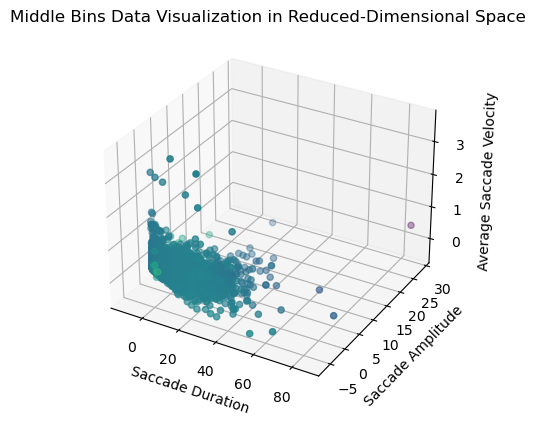

In [160]:
#combining the data into 1 single array with both the indepent variabes 
#and the dependent variable to feed into PCA 

# Perform PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(allMid)

# Visualize the data in the reduced-dimensional space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1],
           principal_components[:, 2], c=principal_components[:, 3])
ax.set_xlabel("Saccade Duration")
ax.set_ylabel("Saccade Amplitude")
ax.set_zlabel("Average Saccade Velocity")
ax.set_title("Middle Bins Data Visualization in Reduced-Dimensional Space")
plt.show()


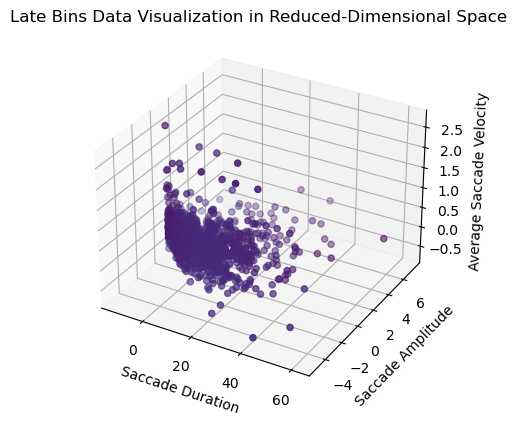

In [161]:
#combining the data into 1 single array with both the indepent variabes 
#and the dependent variable to feed into PCA 

# Perform PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(allLate)

# Visualize the data in the reduced-dimensional space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1],
           principal_components[:, 2], c=principal_components[:, 3])
ax.set_xlabel("Saccade Duration")
ax.set_ylabel("Saccade Amplitude")
ax.set_zlabel("Average Saccade Velocity")
ax.set_title("Late Bins Data Visualization in Reduced-Dimensional Space")
plt.show()
